In [1]:
import numpy
from matplotlib import pyplot, animation
from matplotlib.animation import ArtistAnimation
from IPython.display import HTML
%matplotlib inline

In [2]:
# Set the font family and size to use for Matplotlib figures.
pyplot.rcParams['font.family'] = 'serif'
pyplot.rcParams['font.size'] = 16

In [3]:
def find_nearest(T, T_centre):
    #T_centre_hist = []
    idx = (np.abs(T - T_centre)).argmin()
    print('Temp. at centre :', T[idx], 'at idx = ', idx)
    return idx

In [4]:
def ftcs(T0, nt, dt, dx, dy, alpha):
    
    # Define sigma values for x and y
    sigma_x = alpha * dt / dx**2
    sigma_y = alpha * dt / dy**2
    #Integrate with time
    T = T0.copy()
    T_hist = [T0.copy()]
    T_centre_hist = []
    ny, nx = T.shape
    I, J = int(nx / 2), int(ny /2) #indices of centre
    for n in range(nt): 
        T[1:-1, 1:-1] = (T[1:-1, 1:-1] +
                         sigma_x * (T[1:-1, 2:] - 2.0 * T[1:-1, 1:-1] + T[1:-1, :-2]) +
                         sigma_y * (T[2:, 1:-1] - 2.0 * T[1:-1, 1:-1] + T[:-2, 1:-1]))
        #Applying Neumann condition at bc (zero-gradient, insulation)
        T[-1, :] = T[-2, :] #along top insulated edge
        T[:, -1] = T[:, -2] #along right insulated edge
        #Store values of T
        T_hist.append(T.copy())
        T_centre_hist.append(T[I, J])
        
        
        
        
    return T_hist, T_centre_hist
    

Try to include the answer to the time when temp of centre reaches at 70 deg without interrupting the timestep iterations. Maybe a function that will be like fn(T[I,J] = 70 can help. A function that returns 70 for any value close to 70. 

In [5]:
# Set parameters.
Lx = 0.01  # length of the plate in the x direction
Ly = 0.01  # height of the plate in the y direction
nx = 21  # number of points in the x direction
ny = 21  # number of points in the y direction
dx = Lx / (nx - 1)  # grid spacing in the x direction
dy = Ly / (ny - 1)  # grid spacing in the y direction
alpha = 1e-4  # thermal diffusivity of the plate

# Define the locations along a gridline.
x = numpy.linspace(0.0, Lx, num=nx)
y = numpy.linspace(0.0, Ly, num=ny)

# Compute the initial temperature distribution.
Tb = 100.0  # temperature at the left and bottom boundaries
T0 = 20.0 * numpy.ones((ny, nx))
T0[0, :] = Tb
T0[:, 0] = Tb

In [6]:
# Set the time-step size based on CFL limit.
sigma = 0.25 
dt = sigma * min(dx, dy)**2 / alpha  # time-step size
nt = 100  # number of time steps to compute

# Compute the temperature along the rod.
T_outputs = ftcs(T0, nt, dt, dx, dy, alpha)
print(len(T_outputs))
T_hist, T_centre_hist = T_outputs[0], T_outputs[1]
print(len(T_hist), len(T_centre_hist))
print(T_centre_hist[20])


2
101 100
20.306208096735645


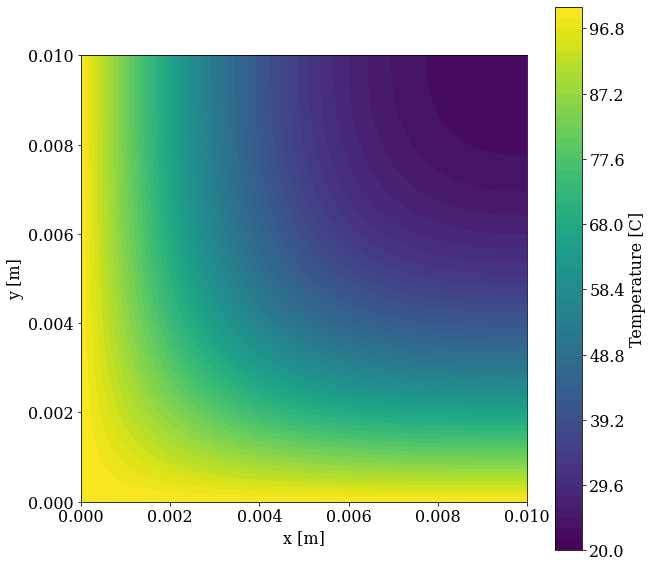

In [7]:
fig = pyplot.figure(figsize=(10.0, 10.0))
ims = []

pyplot.xlabel('x [m]')
pyplot.ylabel('y [m]')
levels = numpy.linspace(20.0, 100.0, num=51)
for i in range(nt):
    contf = pyplot.contourf(x,y,T_hist[i], levels = levels)
    #fig.suptitle('Time step {:0>5}'.format(i))
    #fig.suptitle('Temp centre {:0>}'.format(T_centre_hist[i]))
    ims.append(contf.collections)
cbar = pyplot.colorbar(contf)
cbar.set_label('Temperature [C]')
pyplot.axis('scaled');

In [8]:
ani = ArtistAnimation(fig, ims, interval = 50, repeat = True)

In [9]:
HTML(ani.to_html5_video())

In [10]:
def ftcs_break(T0, nt, dt, dx, dy, alpha):
    # Define sigma values for x and y
    sigma_x = alpha * dt / dx**2
    sigma_y = alpha * dt / dy**2
    #Integrate with time
    T = T0.copy()
    T_hist = [T0.copy()]
    T_centre_hist = []
    ny, nx = T.shape
    I, J = int(nx / 2), int(ny /2) #indices of centre
    for n in range(nt): 
        T[1:-1, 1:-1] = (T[1:-1, 1:-1] +
                         sigma_x * (T[1:-1, 2:] - 2.0 * T[1:-1, 1:-1] + T[1:-1, :-2]) +
                         sigma_y * (T[2:, 1:-1] - 2.0 * T[1:-1, 1:-1] + T[:-2, 1:-1]))
        #Applying Neumann condition at bc (zero-gradient, insulation)
        T[-1, :] = T[-2, :] #along top insulated edge
        T[:, -1] = T[:, -2] #along right insulated edge
        # Check if the center of the domain has reached T = 70C.
        if T[J, I] >= 70.0:
            break
    print('[time step {}] Center at T={:.2f} at t={:.2f} s'
          .format(n + 1, T[J, I], (n + 1) * dt))
    return T
        

In [11]:
# Set the time-step size based on CFL limit.
sigma = 0.25
dt = sigma * min(dx, dy)**2 / alpha  # time-step size
nt = 300  # number of time steps to compute

# Compute the temperature along the rod.
T1 = ftcs_break(T0, nt, dt, dx, dy, alpha)
print(T1[:, -1],T1[:,-2], T1[-1,:])

[time step 256] Center at T=70.02 at t=0.16 s
[100.          95.3603691   90.75898378  86.23335494  81.81959638
  77.5517485   73.4613069   69.57671709  65.92317343  62.5223545
  59.39251422  56.54847075  54.00194948  51.76178182  49.83440751
  48.2241963   46.93398608  45.96541994  45.31939301  44.99630313
  44.99630313] [100.          95.3603691   90.75898378  86.23335494  81.81959638
  77.5517485   73.4613069   69.57671709  65.92317343  62.5223545
  59.39251422  56.54847075  54.00194948  51.76178182  49.83440751
  48.2241963   46.93398608  45.96541994  45.31939301  44.99630313
  44.99630313] [100.          95.3603691   90.75898378  86.23335494  81.81959638
  77.5517485   73.4613069   69.57671709  65.92317343  62.5223545
  59.39251422  56.54847075  54.00194948  51.76178182  49.83440751
  48.2241963   46.93398608  45.96541994  45.31939301  44.99630313
  44.99630313]


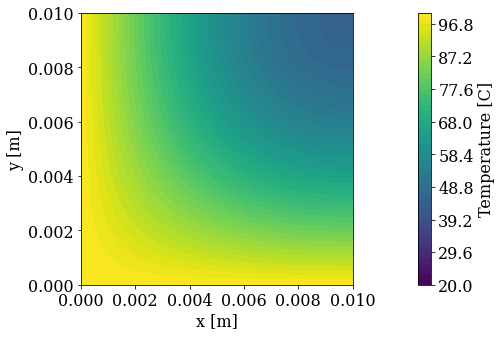

In [12]:
# Plot the filled contour of the temperature.
pyplot.figure(figsize=(8.0, 5.0))
pyplot.xlabel('x [m]')
pyplot.ylabel('y [m]')
levels = numpy.linspace(20.0, 100.0, num=51)
contf = pyplot.contourf(x, y, T1, levels=levels)
cbar = pyplot.colorbar(contf)
cbar.set_label('Temperature [C]')
ax = pyplot.axis('scaled')


In [13]:
def ftcs_heatsink(T0, nt, dt, dx, dy, alpha):
    
    # Define sigma values for x and y
    sigma_x = alpha * dt / dx**2
    sigma_y = alpha * dt / dy**2
    #Integrate with time
    T = T0.copy()
    T_hist2 = [T0.copy()]
    T_centre_hist2 = []
    ny, nx = T.shape
    I, J = int(nx / 2), int(ny /2) #indices of centre
    for n in range(nt): 
        T[1:-1, 1:-1] = (T[1:-1, 1:-1] +
                         sigma_x * (T[1:-1, 2:] - 2.0 * T[1:-1, 1:-1] + T[1:-1, :-2]) +
                         sigma_y * (T[2:, 1:-1] - 2.0 * T[1:-1, 1:-1] + T[:-2, 1:-1]))
         # Check if the center of the domain has reached T = 70C.
        q_sink = 21540
        if T[J, I] < 70.0:
            #Applying Neumann condition at bc (zero-gradient, insulation)
            T[-1, :] = T[-2, :] #along top insulated edge
            T[:, -1] = T[:, -2] #along right insulated edge
        elif T[I, J] >= 70.0:
            T[-1, :] = -q_sink*dx + T[-2, :]
            T[:, -1] = -q_sink*dy + T[-2, :]     
        #Store values of T
        T_hist2.append(T.copy())
        T_centre_hist2.append(T[I, J])
    
    return T_hist2
    

In [14]:
# Set the time-step size based on CFL limit.
sigma = 0.25
dt = sigma * min(dx, dy)**2 / alpha  # time-step size
nt = 400  # number of time steps to compute

# Compute the temperature along the rod.
T2 = ftcs_heatsink(T0, nt, dt, dx, dy, alpha)
I, J = int(nx / 2), int(ny /2)
print(len(T2), T2[280][I, J])
#print(T2[:, -1],T2[:,-2], T2[-1,:])

401 72.30250593492133


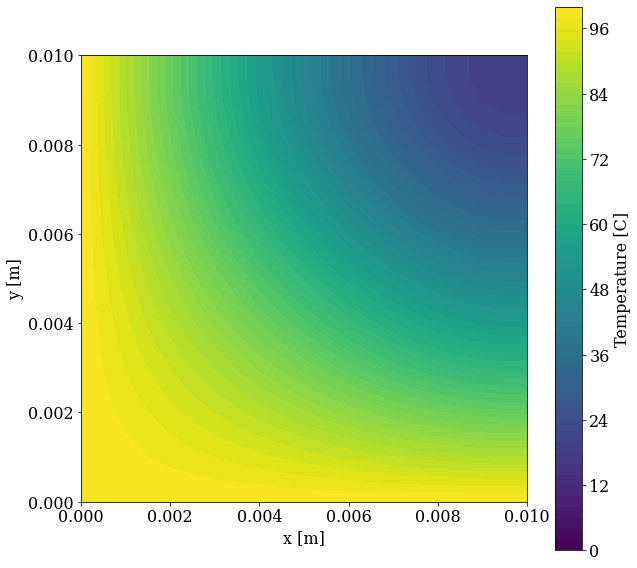

In [15]:
fig2 = pyplot.figure(figsize=(10.0, 10.0))
ims2 = []

pyplot.xlabel('x [m]')
pyplot.ylabel('y [m]')
levels = numpy.linspace(0.0, 100.0, num=51)
for i in range(nt):
    contf = pyplot.contourf(x,y,T2[i], levels = levels)
    #fig.suptitle('Time step {:0>5}'.format(i))
    #fig.suptitle('Temp centre {:0>}'.format(T_centre_hist[i]))
    ims2.append(contf.collections)
cbar = pyplot.colorbar(contf)
cbar.set_label('Temperature [C]')
pyplot.axis('scaled');

In [16]:
ani2 = ArtistAnimation(fig2, ims2, interval = 50, repeat = True)
HTML(ani2.to_html5_video())

The animation above is just an attempt to solve a challenge problem in one of the lessons.